In [2]:
import pandas as pd

tabela = pd.read_csv('advertising.csv')

print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


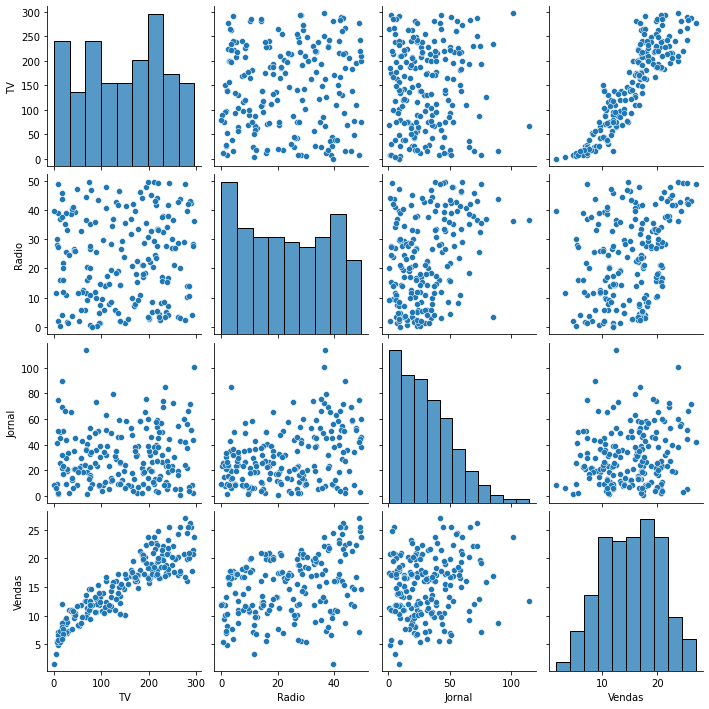

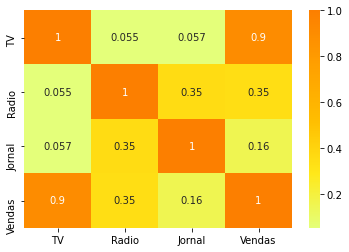

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(tabela)
plt.show()

sns.heatmap(tabela.corr(), cmap='Wistia', annot=True)
plt.show()


Parte da Inteligência Artificial

- Preciso definir o que será valor de teste e o que será valor de treino.
- Por padrão a função train_test_split passa 10% para teste
    - Mas posso definir o que eu quero usando test_size=0.3


In [5]:
from sklearn.model_selection import train_test_split

x = tabela.drop('Vendas', axis=1)
y = tabela['Vendas']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

Temos um problema de regressão - Devo escolher os modelos que vou usar:
- Se eu quiser descobrir um número, tenho um problema de REGRESSÃO
- Se for uma categoria tenho um problema de CLASSIFICAÇÃO

Por ser uma questão de REGRESSÃO vou resolver usando
    - Regressão Linear
    - RandomForest (Árvore de Decisão)

Criaremos 2 modelos para fazer uma comparação entre os dois.
    - Devo aprender como usar cada um 
    - Depois me preocupo com que conta ele faz para chegar nos resultados


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Para criar os modelos da IA
linear = LinearRegression()
randomforest = RandomForestRegressor()

# Para treinar a IA
linear.fit(x_treino, y_treino)
randomforest.fit(x_treino, y_treino)

RandomForestRegressor()

LinearRegression: Pega varios pontos em um gráfico e tenta traçar uma reta média para esses pontos

RandomForestRegressor: Separa por perguntas
    - Ex.: Do Cara a cara. Loiro ou moreno, cabelo ou careca
   

Teste da AI e Avaliação do Melhor Modelo
- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece. o R² é um número que vai de 0 a 100%
    - Quanto mais próximo de 100% melhor
- Olhar o MSE (Erro Quadratico Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

O bom de ter testes diferentes é poder fazer comparações e ver qual é melhor.


In [9]:
from sklearn import metrics

# Pede para fazer a previsão de teste
teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)

# Avaliar a qualidade dos testes
# Comparando os valores de previsão com os de teste
r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_random = metrics.r2_score(y_teste, teste_random)
print(f'R² linear: {r2_linear:.6f}', f'R² random {r2_random:.6f}')

# Erro quadratico médio
erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_random = metrics.mean_squared_error(y_teste, teste_random)
print(f'Erro linear: {erro_linear:.6f}', f'Erro Random: {erro_random:.6f}')

R² linear: 0.871431 R² random 0.935997
Erro linear: 3.263583 Erro Random: 1.624646


Visualição Gráfica das Previsões


,Vendas Reais,Previsão Random
0,11.9,10.602
1,18.9,20.110
2,8.8,8.775
3,17.7,17.578
4,10.3,12.309
5,7.3,7.294
6,11.9,11.221
7,16.4,16.868
8,19.6,21.117
9,10.7,12.418


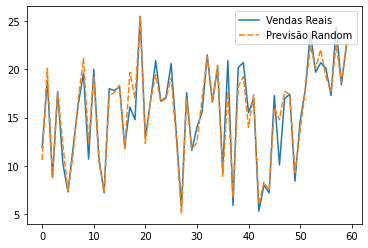

In [15]:
tabela_comparaçao = pd.DataFrame()
tabela_comparaçao["Vendas Reais"] = y_teste
tabela_comparaçao['Previsão Random'] = teste_random

# Para organizar a tabela  em ordem 
# drop=True: joga fora a tabela anterior
# reset_index: Joga o index fora, o antigo
tabela_comparaçao = tabela_comparaçao.reset_index(drop=True)

display(tabela_comparaçao)

# Colocar essas informações em um gráfico
sns.lineplot(data=tabela_comparaçao)
plt.show()

Com o gráfico podemos ver que as linhas estão caminhando juntos
- Poucos Erros. 

Fazendo as previsãoes para os próximos gráficos


In [ ]:
# randomforest.predict(Tv, radio, jornal)
# Seguir o mesmo passo a passo
# Porém a IA já está treinada


Qual a importância de cada variavel para as vendas

In [20]:
print('Mostra qual é mais eficiente.')
print(randomforest.feature_importances_)
# Vai mostra quais são os mais importantes
# Quanto mais próximo de 1, mais importante
print(' Tv          Rádio      Jornal')


[0.85375561 0.13032607 0.01591832]
 Tv          Rádio      Jornal


In [25]:
# Mostrará o total gasto em cada um:
# Precisa dos dois colchetes
print('Mostra o total gasto em cada um:')
print(tabela[['Radio', 'Jornal']].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64


Analisando o mais eficiente e o total gasto, vemos que o Rádio trás mais resultado que o Jornal, e que estamos investindo mais em Jornal do que em Rádio
